In [21]:
# Initializing the app
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import *
spark = SparkSession.builder.appName('wtam186_Iteration4').getOrCreate()

In [22]:
# Loading dataset
df = spark.read.csv('./Datasets/COVID-19 Survey Student Responses.csv', header='true')
df

DataFrame[ID: string, Region of residence: string, Age of Subject: string, Time spent on Online Class: string, Rating of Online Class experience: string, Medium for online class: string, Time spent on self study: string, Time spent on fitness: string, Time spent on sleep: string, Time spent on social media: string, Prefered social media platform: string, Time spent on TV: string, Number of meals per day: string, Change in your weight: string, Health issue during lockdown: string, Stress busters: string, Time utilized: string, Do you find yourself more connected with your family, close friends , relatives  ?: string, What you miss the most: string]

# Step 2.1: Initial Inspection on the dataset

In [23]:
# Understanding the data by showing the top 10 rows and displaying specific columns in a clear and tidy format (to avoid output being truncated)
df.select("ID", "Region of residence", "Age of Subject", "Time spent on Online Class", "Rating of Online Class experience").show(10)
df.select("Medium for online class", "Time spent on self study", "Time spent on fitness", "Time spent on sleep").show(10)
df.select("Time spent on social media", "Prefered social media platform", "Time spent on TV", "Number of meals per day").show(10)
df.select("Change in your weight", "Health issue during lockdown", "Stress busters", "Time utilized").show(10)
df.select("Do you find yourself more connected with your family, close friends , relatives  ?", "What you miss the most").show(10)


+---+-------------------+--------------+--------------------------+---------------------------------+
| ID|Region of residence|Age of Subject|Time spent on Online Class|Rating of Online Class experience|
+---+-------------------+--------------+--------------------------+---------------------------------+
| R1|          Delhi-NCR|            21|                         2|                             Good|
| R2|          Delhi-NCR|            21|                         0|                        Excellent|
| R3|          Delhi-NCR|            20|                         7|                        Very poor|
| R4|          Delhi-NCR|            20|                         3|                        Very poor|
| R5|          Delhi-NCR|            21|                         3|                             Good|
| R6|          Delhi-NCR|            21|                         0|                        Very poor|
| R7|          Delhi-NCR|            19|                         2|               

# Step 2.2 Describing the data

In [24]:
# Obtaining the data type of each column
df.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Region of residence: string (nullable = true)
 |-- Age of Subject: string (nullable = true)
 |-- Time spent on Online Class: string (nullable = true)
 |-- Rating of Online Class experience: string (nullable = true)
 |-- Medium for online class: string (nullable = true)
 |-- Time spent on self study: string (nullable = true)
 |-- Time spent on fitness: string (nullable = true)
 |-- Time spent on sleep: string (nullable = true)
 |-- Time spent on social media: string (nullable = true)
 |-- Prefered social media platform: string (nullable = true)
 |-- Time spent on TV: string (nullable = true)
 |-- Number of meals per day: string (nullable = true)
 |-- Change in your weight: string (nullable = true)
 |-- Health issue during lockdown: string (nullable = true)
 |-- Stress busters: string (nullable = true)
 |-- Time utilized: string (nullable = true)
 |-- Do you find yourself more connected with your family, close friends , relatives  ?: string (nu

In [25]:
df.count()

1182

In [26]:
len(df.columns)

19

# Step 2.3: Data exploration

In [27]:
!pip3 install seaborn
!pip3 install --upgrade pip
import numpy as np
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.1 MB/s eta 0:00:00a 0:00:01


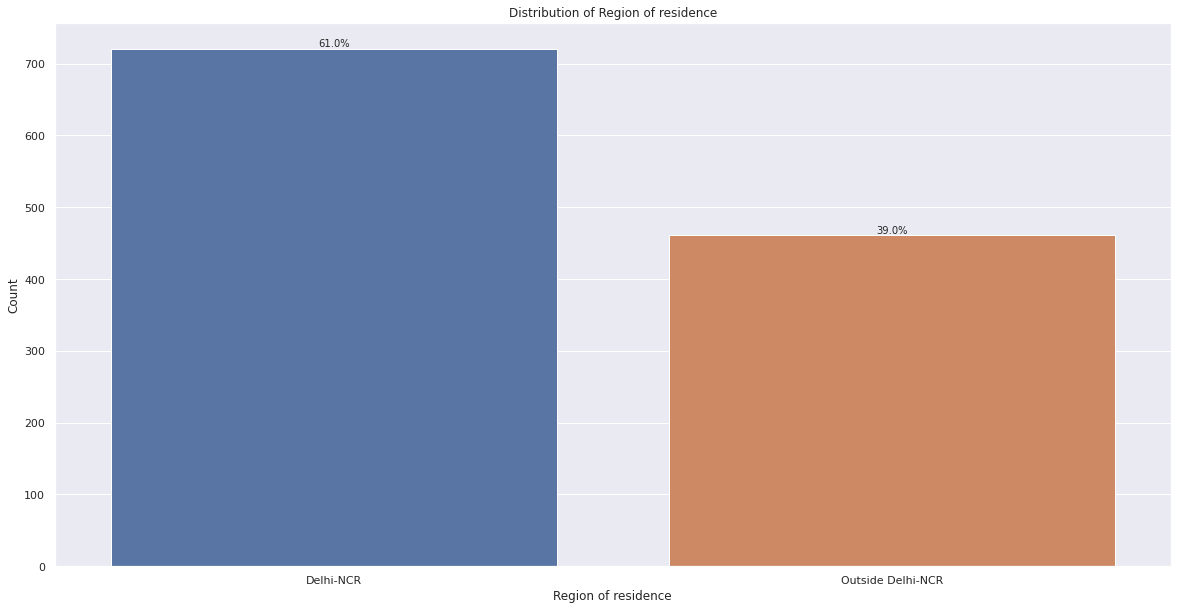

In [30]:
#Could not use pyspark to create the histogram for the 'Region of residence' column
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot

df=pd.read_csv('./Datasets/COVID-19 Survey Student Responses.csv')

sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
ax = sns.countplot(x='Region of residence', data=df)
# Calculate percentages
total = len(df)
counts = df['Region of residence'].value_counts()
percentages = counts / total * 100
# Annotate the bars with percentage labels
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.annotate(f'{percentages[i]:.1f}%',
    (p.get_x() + p.get_width() / 2., height),
    ha='center', va='bottom')
plt.xlabel('Region of residence')
plt.ylabel('Count')
plt.title('Distribution of Region of residence')
plt.show()